In [0]:
import pandas as pd 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#data=pd.read_excel("/content/drive/My Drive/Data_Train_verzeo.xlsx")
data=pd.read_excel("/content/drive/My Drive/Data_Train (1).xlsx")

In [0]:
print(data.head())

                               Name    Location  Year  ...  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010  ...    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011  ...    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012  ...    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...    5.0        NaN  17.74

[5 rows x 13 columns]


In [0]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [0]:
data['New_Price'].notnull().sum()

824

In [0]:
import numpy as np 
bin1=np.linspace((min((data['Kilometers_Driven']))),(max((data['Kilometers_Driven']))),10)
group_values=[9,8,7,6,5,4,3,2,1]
data['Kilometers_Driven-binned']=pd.cut(data['Kilometers_Driven'],bin1,labels=group_values,include_lowest=True)

In [0]:
data.head(100)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Kilometers_Driven-binned
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,9
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Honda Amaze SX i-DTEC,Kolkata,2015,30000,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,3.50,9
96,Volkswagen Polo Diesel Highline 1.2L,Kolkata,2013,34212,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.79,9
97,Hyundai Verna Transform SX VGT CRDi,Ahmedabad,2010,70002,Diesel,Manual,First,16.2 kmpl,1493 CC,110 bhp,5.0,NaN,3.45,9
98,Maruti Wagon R VXI BS IV,Bangalore,2016,62000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,4.45,9


ValueError: ignored

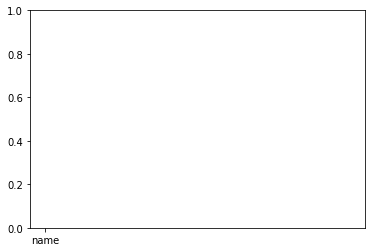

In [0]:
import matplotlib.pyplot as plt
plt.hist('name','Kilometers_Driven_binned')
plt.show()

In [0]:
data.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


(0, 187.2458661255102)

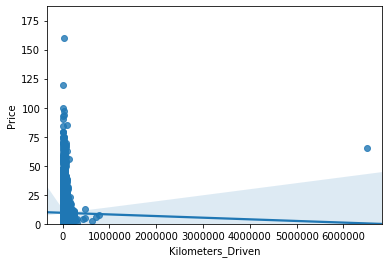

In [0]:
sns.regplot(x="Kilometers_Driven", y="Price", data=data)
plt.ylim(0,)

In [0]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [0]:
data.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,63.71 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [0]:
data['Fuel_Type'].count()

6019

KeyboardInterrupt: ignored

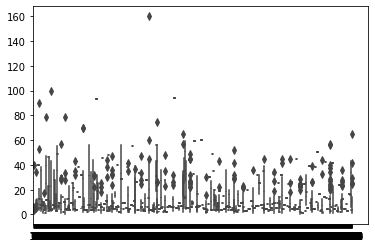

In [0]:
sns.boxplot(x='Kilometers_Driven',y='Price',data=data)

In [0]:
from scipy import stats

In [0]:
pearson_coef, p_value = stats.pearsonr(data['Kilometers_Driven'], data['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.011492790740116172  with a P-value of P = 0.3726714985699097


12038 6019


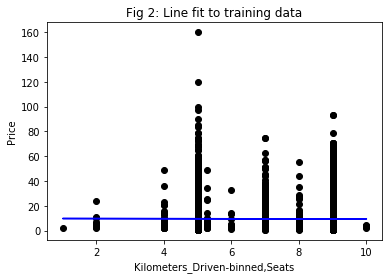

In [48]:
from sklearn.linear_model import LinearRegression
import numpy as np
lm=LinearRegression()
data['Seats'].dropna()
#data[data==np.inf]=np.nan
data.fillna(data.mean(), inplace=True)
x=data[['Kilometers_Driven-binned','Seats']]
y=data[['Price']]
#print(x.size,y.size)
arr = x.values.copy()
arr.resize(6019, 1)
x=pd.DataFrame(arr)
lm.fit(x,y)
#Fit the line to the training data

#Plot the line
plt.scatter(x, y, color='black')
plt.plot(x.values,lm.predict(x.values),color='blue')
plt.xlabel('Kilometers_Driven-binned,Seats')
plt.ylabel('Price')
plt.title('Fig 2: Line fit to training data')
plt.show()

In [50]:
mean_val_error = np.mean( (y - lm.predict(x.values))**2)

print('Validation MSE: ', mean_val_error)

Validation MSE:  Price    125.143669
dtype: float64


In [0]:
data['Seats'].dropna()

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 5977, dtype: float64

In [0]:
data['Seats'].isnull().sum()

42

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('mode',LinearRegression())]
pipe=Pipeline(input)
pipe.train(data['Kilometers_Driven','seats'],data['Price'])
yhat=pipe.predict(data['Kilometers_Driven','seats'])
print(yhat)

AttributeError: ignored

In [0]:
lm.score()